In [10]:
# Yogawan
# 5220411056

# Latihan 5.4
# Soal No. 1
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

# Define the weather, temperature, and attendance datasets
cuaca = ['panas', 'panas', 'mendung', 'hujan', 'hujan', 'hujan', 'mendung', 'panas', 'panas',
        'hujan', 'panas', 'mendung', 'mendung', 'hujan']
kategori_suhu = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
kuliah = ['Tidak', 'Tidak', 'Ya', 'Ya', 'Ya', 'Tidak', 'Ya', 'Tidak',
          'Ya', 'Ya', 'Ya', 'Ya', 'Ya', 'Tidak']

# Initialize a LabelEncoder object
le = preprocessing.LabelEncoder()

# Encode the weather dataset as integers
cuaca_encoded = le.fit_transform(cuaca)

# Encode the temperature dataset as integers
suhu_encoded = le.fit_transform(kategori_suhu)

# Encode the attendance dataset as integers
label = le.fit_transform(kuliah)

# Combine the encoded weather and temperature datasets into a list of tuples
fitur = list(zip(cuaca_encoded, suhu_encoded))

# Initialize a Gaussian Naive Bayes classifier
model = GaussianNB()

# Train the classifier using the combined dataset and attendance labels
model.fit(fitur, label)

# Predict the attendance labels for the following weather and temperature conditions
predicted = model.predict([[0, 2], [2, 0]])

# Define the true attendance labels for the given weather and temperature conditions
truelabel = [1, 0]

# Print the true attendance labels
print("True label:", truelabel,", Predicted:", predicted)

True label: [1, 0] , Predicted: [1 1]


In [ ]:
# Soal No. 2
# Hasil Analisis
# 1. Data Encoding: Data cuaca, suhu, dan kehadiran diencode menggunakan LabelEncoder untuk mengubah data kategori menjadi data numerik yang dapat diproses oleh model. Ini diperlukan karena model-machine learning memerlukan data dalam bentuk numerik.
# 2. Pemodelan: Model Gaussian Naive Bayes digunakan untuk memodelkan hubungan antara cuaca, suhu, dan kehadiran. Naive Bayes adalah metode klasifikasi probabilitas yang mengasumsikan bahwa nilai-nilai fitur adalah independen satu sama lain. Dalam hal ini, kita menggunakan model Gaussian Naive Bayes yang sesuai untuk fitur kontinu yang memiliki distribusi Gaussian.
# 3. Prediksi: Model tersebut digunakan untuk memprediksi kehadiran berdasarkan data cuaca dan suhu yang baru diberikan. Dalam kode ini, kami memprediksi kehadiran untuk dua skenario cuaca dan suhu yang berbeda.
# 4. Evaluasi: Kami membandingkan prediksi model dengan label kehadiran yang sebenarnya untuk mengevaluasi kinerja model. Dalam kasus ini, prediksi model dibandingkan dengan label kehadiran yang diberikan secara manual.

/Users/pratama/Downloads/Navie Bayes/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


True label: [1, 0] , Predicted: [1 1]


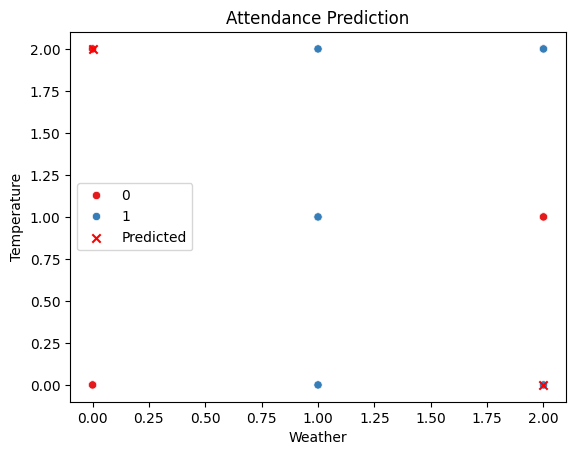

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

# Define the weather, temperature, and attendance datasets
cuaca = ['panas', 'panas', 'mendung', 'hujan', 'hujan', 'hujan', 'mendung', 'panas', 'panas',
        'hujan', 'panas', 'mendung', 'mendung', 'hujan']
kategori_suhu = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
kuliah = ['Tidak', 'Tidak', 'Ya', 'Ya', 'Ya', 'Tidak', 'Ya', 'Tidak',
          'Ya', 'Ya', 'Ya', 'Ya', 'Ya', 'Tidak']

# Additional 5 test data
additional_cuaca = ['hujan', 'panas', 'mendung', 'hujan', 'panas']
additional_kategori_suhu = ['Mild', 'Cool', 'Mild', 'Hot', 'Hot']
additional_kuliah = ['Ya', 'Tidak', 'Ya', 'Ya', 'Tidak']

# Initialize a LabelEncoder object
le = preprocessing.LabelEncoder()

# Encode the weather dataset as integers
cuaca_encoded = le.fit_transform(cuaca)

# Encode the temperature dataset as integers
suhu_encoded = le.fit_transform(kategori_suhu)

# Encode the attendance dataset as integers
label = le.fit_transform(kuliah)

# Combine the encoded weather and temperature datasets into a DataFrame
data = pd.DataFrame({'Cuaca': cuaca_encoded, 'Suhu': suhu_encoded, 'Kuliah': label})

# Initialize a Gaussian Naive Bayes classifier
model = GaussianNB()

# Train the classifier using the combined dataset and attendance labels
model.fit(data[['Cuaca', 'Suhu']], data['Kuliah'])

# Predict the attendance labels for the following weather and temperature conditions
predicted = model.predict([[0, 2], [2, 0]])

# Define the true attendance labels for the given weather and temperature conditions
truelabel = [1, 0]

# Print the true attendance labels
print("True label:", truelabel,", Predicted:", predicted)

# Plot the data points
sns.scatterplot(x='Cuaca', y='Suhu', hue='Kuliah', data=data, palette='Set1', legend='full')

# Plot the predicted points
plt.scatter([0, 2], [2, 0], marker='x', color='red', label='Predicted')

plt.xlabel('Weather')
plt.ylabel('Temperature')
plt.title('Attendance Prediction')
plt.legend()
plt.show()

Akurasi: 0.75


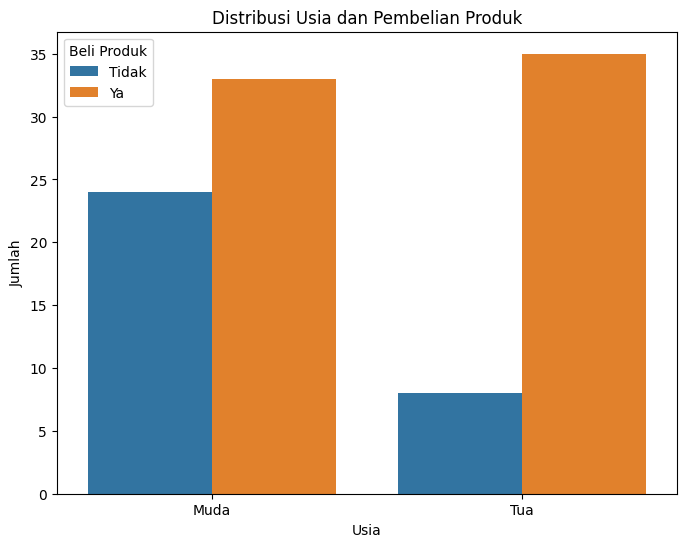

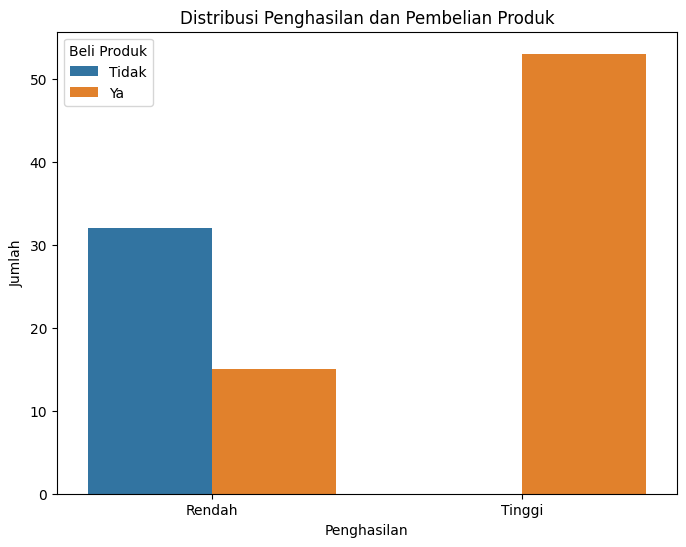

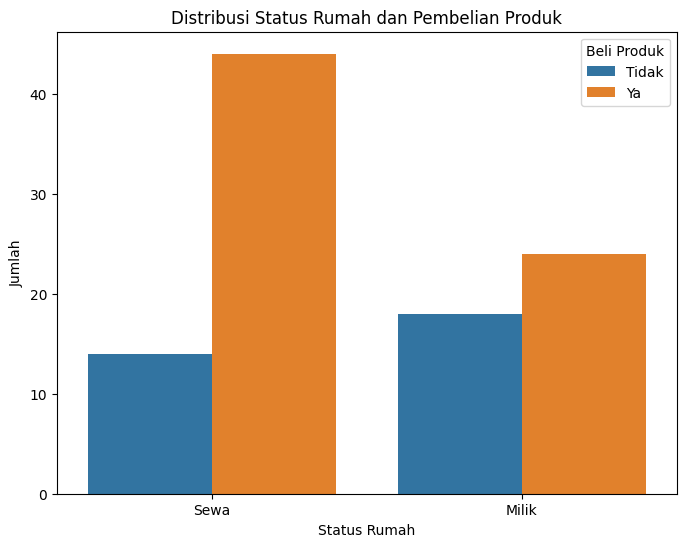

In [24]:
# Tugas 5.5
# link dataset: https://www.kaggle.com/datasets/willianoliveiragibin/telecom-stats

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score

# Memuat dataset
data = pd.read_csv('dataset.csv')

# Pemrosesan Data
# Ubah data kategorikal menjadi numerik
data['Usia'] = data['Usia'].map({'Muda': 0, 'Tua': 1})
data['Penghasilan'] = data['Penghasilan'].map({'Rendah': 0, 'Tinggi': 1})
data['Status Rumah'] = data['Status Rumah'].map({'Sewa': 0, 'Milik': 1})
data['Beli Produk'] = data['Beli Produk'].map({'Tidak': 0, 'Ya': 1})

# Pisahkan fitur dan target
X = data.drop('Beli Produk', axis=1)
y = data['Beli Produk']

# Pembagian Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan Melatih Model Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Visualisasi dengan Seaborn
# Plot countplot untuk Usia
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Usia', hue='Beli Produk')
plt.title('Distribusi Usia dan Pembelian Produk')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.xticks(ticks=[0, 1], labels=['Muda', 'Tua'])
plt.legend(title='Beli Produk', labels=['Tidak', 'Ya'])
plt.show()

# Plot countplot untuk Penghasilan
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Penghasilan', hue='Beli Produk')
plt.title('Distribusi Penghasilan dan Pembelian Produk')
plt.xlabel('Penghasilan')
plt.ylabel('Jumlah')
plt.xticks(ticks=[0, 1], labels=['Rendah', 'Tinggi'])
plt.legend(title='Beli Produk', labels=['Tidak', 'Ya'])
plt.show()

# Plot countplot untuk Status Rumah
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Status Rumah', hue='Beli Produk')
plt.title('Distribusi Status Rumah dan Pembelian Produk')
plt.xlabel('Status Rumah')
plt.ylabel('Jumlah')
plt.xticks(ticks=[0, 1], labels=['Sewa', 'Milik'])
plt.legend(title='Beli Produk', labels=['Tidak', 'Ya'])
plt.show()
